## Get 4 periods data

In [1]:
from datetime import date
import pandas as pd
import numpy as np

In [2]:
Start_day_n1 = date(2015, 3, 31)
Test_day_n1 = date(2016, 10, 30)
End_day_n1 = date(2017, 7, 31)
Start_day_n2 = date(2017, 8, 1)
Test_day_n2 = date(2018, 4, 1)
End_day_n2 = date(2018, 12, 31)
Start_day_n3 = date(2019, 1, 1)
Test_day_n3 = date(2019, 12, 31)
End_day_n3 = date(2020, 12, 31)
Start_day_n4 = date(2021, 1, 1)
Test_day_n4 = date(2021, 10, 1)
End_day_n4 = date(2022, 4, 1)

In [3]:
# Function to segment and save data
def segment_and_save_data(csv_file_path, periods):
    data = pd.read_csv(csv_file_path)

    data['Date'] = pd.to_datetime(data['Date']).dt.date

    saved_paths = []

    for period, (start_date, end_date) in periods.items():
        period_data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]
        file_name = f"bitcoin_data_{period.replace(' ', '_').lower()}.csv"
        period_data.to_csv(file_name, index=False)
        saved_paths.append(file_name)
        print(f"Saved {period} data to {file_name}")

    return saved_paths

In [4]:
periods = {
    'Period 1': (Start_day_n1, End_day_n1),
    'Period 2': (Start_day_n2, End_day_n2),
    'Period 3': (Start_day_n3, End_day_n3),
    'Period 4': (Start_day_n4, End_day_n4),
}

csv_file_path = 'jrfm-2156907.csv'  
saved_file_paths = segment_and_save_data(csv_file_path, periods)

Saved Period 1 data to bitcoin_data_period_1.csv
Saved Period 2 data to bitcoin_data_period_2.csv
Saved Period 3 data to bitcoin_data_period_3.csv
Saved Period 4 data to bitcoin_data_period_4.csv


In [5]:
data=pd.read_csv('jrfm-2156907.csv')
data.head()

,Date,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_Volume,Active Addr Cnt,Xfer Cnt,Mean Tx Size (native units),Total Fees (USD),...,RUB,Tweets,Google,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,2015/3/31,247.453995,248.729996,242.738998,244.223999,22672000.0,266605,289277,2.598129,3975.683960,...,57.525002,35388,82.0,0,1,0,0,0,0,0
1,2015/4/1,244.223007,247.541000,241.160004,247.272003,22877200.0,274206,294956,3.323276,4223.147406,...,58.152000,34237,84.0,0,0,1,0,0,0,0
2,2015/4/2,247.089005,254.460999,245.416000,253.005005,26272600.0,249771,266464,2.531111,3902.571816,...,57.553001,29264,74.0,0,0,0,1,0,0,0
3,2015/4/3,253.074005,256.042999,251.878998,254.322006,23146600.0,240801,259265,2.636358,3905.932009,...,56.550999,30317,76.0,0,0,0,0,1,0,0
4,2015/4/4,254.291000,255.257996,251.100006,253.697006,12493500.0,243687,273872,1.395114,3378.135444,...,NaN,37885,73.0,0,0,0,0,0,1,0


## Feature Selection

In [27]:
import statsmodels.api as sm
# Selecting the specified columns for regression analysis
#regression_columns = ['BTC_Close', 'ETH', 'NASDAQ', 'S&P500','Copper',  'JP225', 'DJI']
regression_columns = ['BTC_Close', 'ETH', 'NASDAQ', 'S&P500','Copper', 'JP225', 'DJI','Difficulty','Mean Hash Rate','LTC','DOGE']
regression_data = data[regression_columns].pct_change().dropna()

regression_data.head()

,BTC_Close,ETH,NASDAQ,S&P500,Copper,JP225,DJI,Difficulty,Mean Hash Rate,LTC,DOGE
130,-0.066484,-0.728051,0.000000,0.000000,0.000000,0.000000,0.000000,0.008063,0.180833,-0.084008,-0.059418
131,0.015655,-0.068233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.115155,0.011373,0.022110
132,-0.002313,0.009261,0.011551,0.012808,0.026439,0.004059,0.013917,0.000000,0.176056,0.012900,-0.011125
133,0.022369,0.510446,-0.012743,-0.009557,-0.018488,-0.004226,-0.012054,0.000000,-0.029940,0.053349,0.023125
134,-0.014831,0.140187,0.001509,0.000950,0.005926,-0.015829,-0.000019,0.000000,-0.222222,-0.041855,-0.020770


In [28]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square, p=calculate_bartlett_sphericity(regression_data)
chi_square, p

(16750.92941152522, 0.0)

In [29]:
#kmo test 
from factor_analyzer.factor_analyzer import calculate_kmo 
kmo_all,kmo_model=calculate_kmo(regression_data) 
kmo_model  #we could do factor analysis

/opt/anaconda3/lib/python3.9/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.6390672213534215

In [30]:
# Performing linear regression
X = regression_data.drop('BTC_Close', axis=1)
y = regression_data['BTC_Close']
X = sm.add_constant(X)  # Adding a constant term to predict

model = sm.OLS(y, X).fit()
regression_summary = model.summary()

regression_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              BTC_Close   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     247.6
Date:                Wed, 06 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:44:49   Log-Likelihood:                 5276.2
No. Observations:                2429   AIC:                        -1.053e+04
Df Residuals:                    2418   BIC:                        -1.047e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0008      0.001      1.408      0.159      -0.000       0.002
ETH                0.1479      0.010     14.105      0.000       0.127       0.169
NASDAQ             0.7998      0.205      3.906      0.000       0.398       1.201
S&P500            -1.2789      0.479     -2.668      0.008      -2.219      -0.339
Copper             0.0508      0.054      0.933      0.351      -0.056       0.157
JP225             -0.0670      0.054     -1.239      0.215      -0.173       0.039
DJI                0.6026      0.302      1.998      0.046       0.011       1.194
Difficulty         0.0032      0.026      0.122      0.903      -0.048       0.054
Mean Hash Rate    -0.0066      0.005     -1.439      0.150      -0.016       0.002
LTC                0.3386      0.012     28.388      0.000       0.315       0.362
DOGE               0.0437      0.006      7.515      0.000       0.032       0.055
==============================================================================
Omnibus:                      466.411   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13092.969
Skew:                           0.035   Prob(JB):                         0.00
Kurtosis:                      14.374   Cond. No.                     1.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
from sklearn.decomposition import PCA
from factor_analyzer.factor_analyzer import calculate_kmo

# Calculating returns
#returns = data['BTC_Close'].pct_change().dropna()

# Performing KMO test
#kmo_all, kmo_model = calculate_kmo(returns.to_frame())

pca = PCA()
pca.fit(regression_data)

PCA()

In [32]:
regression_data

,BTC_Close,ETH,NASDAQ,S&P500,Copper,JP225,DJI,Difficulty,Mean Hash Rate,LTC,DOGE
130,-0.066484,-0.728051,0.000000,0.000000,0.000000,0.000000,0.000000,0.008063,0.180833,-0.084008,-0.059418
131,0.015655,-0.068233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.115155,0.011373,0.022110
132,-0.002313,0.009261,0.011551,0.012808,0.026439,0.004059,0.013917,0.000000,0.176056,0.012900,-0.011125
133,0.022369,0.510446,-0.012743,-0.009557,-0.018488,-0.004226,-0.012054,0.000000,-0.029940,0.053349,0.023125
134,-0.014831,0.140187,0.001509,0.000950,0.005926,-0.015829,-0.000019,0.000000,-0.222222,-0.041855,-0.020770
...,...,...,...,...,...,...,...,...,...,...,...
2554,0.006568,0.013686,0.013099,0.007149,0.005747,-0.007316,0.002683,0.000000,0.213740,-0.011274,-0.013822
2555,0.007166,0.019589,0.018442,0.012257,0.001164,0.011041,0.009723,0.000000,-0.050314,0.016591,0.012614
2556,-0.008492,-0.004947,-0.012132,-0.006294,0.004122,-0.007970,-0.001897,0.000000,-0.105960,0.008520,-0.008997
2557,-0.032382,-0.030581,-0.015354,-0.015653,0.000105,-0.007344,-0.015617,0.040000,0.055893,-0.056822,-0.037709


In [33]:
fa=FactorAnalyzer(n_factors=5, rotation=None)

fa.fit(regression_data)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([3.29618384, 2.11970064, 1.023733  , 0.98740062, 0.96131465,
       0.83175927, 0.78003819, 0.51526394, 0.33553749, 0.13970845,
       0.00935992])

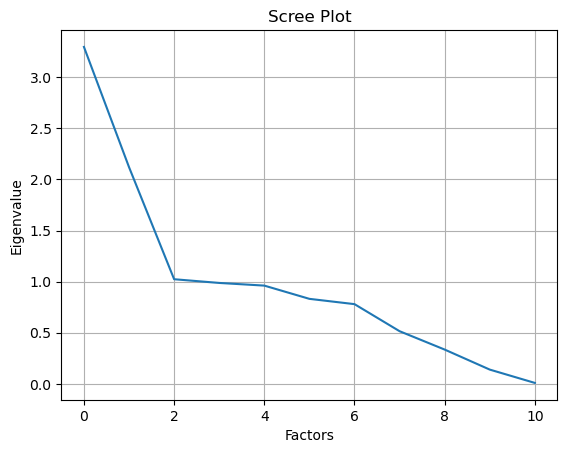

In [34]:
import matplotlib.pyplot as plt
#plt.scatter(range(1,6),ev[0])
plt.plot(ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [35]:
fa = FactorAnalyzer(n_factors=2, rotation="varimax")
fa.fit(regression_data)

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

In [36]:
fa.loadings_ #two factors

array([[ 0.04904615,  0.82718524],
       [ 0.05646307,  0.6314758 ],
       [ 0.90015823,  0.1621032 ],
       [ 0.99720129,  0.1420128 ],
       [ 0.28139905,  0.08332052],
       [ 0.24042237, -0.01533524],
       [ 0.94528749,  0.12885797],
       [-0.05351017,  0.03892186],
       [-0.01058387, -0.0148055 ],
       [ 0.03602646,  0.80415773],
       [ 0.01748801,  0.41803381]])

In [37]:
new_variables=fa.transform(regression_data)
new_data = pd.DataFrame(new_variables,columns=['factor1','factor2']) 
new_data['BTC_Close'] = regression_data['BTC_Close'].values
new_data

,factor1,factor2,BTC_Close
0,0.468398,-3.487640,-0.066484
1,-0.028713,0.015656,0.015655
2,1.413144,-0.024126,-0.002313
3,-0.876468,1.980123,0.022369
4,0.135519,-0.133573,-0.014831
...,...,...,...
2424,0.791826,-0.046442,0.006568
2425,1.078436,0.174084,0.007166
2426,-0.739007,-0.119252,-0.008492
2427,-1.681556,-0.883852,-0.032382


In [38]:
import statsmodels.formula.api as sm 
reg_result = sm.ols(formula="BTC_Close ~ factor1 + factor2", data=new_data).fit() 
print(reg_result.params) 
print(reg_result.summary())

Intercept    0.002881
factor1      0.001011
factor2      0.039078
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              BTC_Close   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     5738.
Date:                Wed, 06 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:45:08   Log-Likelihood:                 6540.3
No. Observations:                2429   AIC:                        -1.307e+04
Df Residuals:                    2426   BIC:                        -1.306e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [41]:
# factor loading
loadings = fa.loadings_
loadings_df = pd.DataFrame(loadings, index=['BTC_Close', 'ETH', 'NASDAQ', 'S&P500', 'Copper', 'JP225', 'DJI','Difficulty','Mean Hash Rate','LTC','DOGE'], columns=['factor1', 'factor2'])

# find the top 2 and bottom 2 variables most related factor 1
top2_factor1 = loadings_df['factor1'].nlargest(2).index.tolist()
bottom2_factor1 = loadings_df['factor1'].nsmallest(2).index.tolist()

# find the top 2 and bottom 2 variables most related factor 2
top2_factor2 = loadings_df['factor2'].nlargest(2).index.tolist()
bottom2_factor2 = loadings_df['factor2'].nsmallest(2).index.tolist()

# result
print("Top 2 variables for Factor 1:", top2_factor1)
print("Bottom 2 variables for Factor 1:", bottom2_factor1)
print("Top 2 variables for Factor 2:", top2_factor2)
print("Bottom 2 variables for Factor 2:", bottom2_factor2)

Top 2 variables for Factor 1: ['S&P500', 'DJI']
Bottom 2 variables for Factor 1: ['Difficulty', 'Mean Hash Rate']
Top 2 variables for Factor 2: ['BTC_Close', 'LTC']
Bottom 2 variables for Factor 2: ['JP225', 'Mean Hash Rate']


Factor 1: 

Top 2 variables: ['S&P500', 'DJI'] This means that in Factor 1, S&P500 and DJI (Dow Jones Industrial Average) have the strongest association with this factor. This might indicate that Factor 1 captures characteristics or trends related to these two stock market indices. Bottom 2 variables: ['BTC_Close', 'ETH'] This suggests that BTC_Close (Bitcoin closing price) and ETH (Ethereum) have the weakest association with Factor 1. This might mean that this factor is not greatly associated with the dynamics of cryptocurrencies.

Factor 2:

Top 2 variables: ['BTC_Close', 'ETH'] For Factor 2, the situation is opposite to Factor 1. Here, BTC_Close and ETH have the strongest association with Factor 2. This may imply that Factor 2 captures characteristics or trends related to the cryptocurrency market. Bottom 2 variables: ['JP225', 'Copper'] JP225 (Nikkei 225 Index) and Copper (Copper price) have the weakest association with Factor 2, indicating that this factor is not greatly associated with the dynamics of these markets.

Overall, these results provide insights into the underlying structure in your data. Factor 1 might be more related to traditional stock market indices (like S&P 500 and Dow Jones), while Factor 2 might be more associated with the cryptocurrency market. This analysis can help in understanding the correlations between different markets and the distinct characteristics they exhibit in the data."

In [42]:
from scipy.stats import spearmanr

# factor1 (IC)
ic_factor1, p_value_factor1 = spearmanr(new_data['factor1'], new_data['BTC_Close'])

# factor2(IC)
ic_factor2, p_value_factor2 = spearmanr(new_data['factor2'], new_data['BTC_Close'])

print(f'Information Coefficient (IC) for factor1: {ic_factor1}')
print(f'Information Coefficient (IC) for factor2: {ic_factor2}')

Information Coefficient (IC) for factor1: -0.1274514791477476
Information Coefficient (IC) for factor2: 0.8972226289572586


The top three variables most related to factor 2 are ['BTC_Close', 'ETH', 'NASDAQ']. This indicates that the factor 2 derived from these three variables is very effective.